In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
h = 0.5
L = 1.
N = int(L / h) + 1
y_0 = 2.
y_1 = 6.25

In [25]:
def solve(p):
    Y = np.zeros(N, dtype = float)
    Y[0] = y_0
    Y[1] = p * h + Y[0]
    for n in range(2, N):
        Y[n] = 2 * Y[n - 1] - Y[n - 2] + h**2 * (Y[n - 1]**2 + 1)
    return Y

In [26]:
def newthon(p0, eps = 1e-2, dp = 1e-3):
    p = p0
    i = 0
    while True:
        i += 1
        fp = solve(p)
        dfp = (solve(p + dp) - solve(p - dp)) / 2. / dp
        p -= (fp[-1] - y_1) / dfp[-1]
        if np.abs(fp[-1] - y_1) < eps or i > 1000: return p, fp, i

p = 1.85641, y_1 = 6.2500000000513207, n = 4


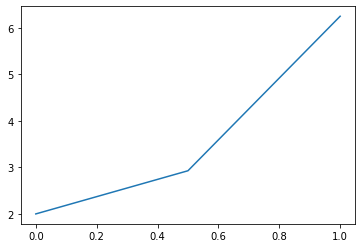

In [33]:
p, Y, n = newthon(1., 1e-6)
print('p = %.5f, y_1 = %.16f, n = %d' % (p, Y[-1], n))
plt.plot(np.linspace(0, L, N), Y);